In [2]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain  = pd.read_csv('../../data/niwa_cleaned/1971-2023-WeatherData.csv', parse_dates=['Date'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18834 non-null  datetime64[ns]
 1   Wdir (Deg)     18831 non-null  float64       
 2   WSpd (m/s)     18831 non-null  float64       
 3   GustDir (Deg)  18484 non-null  float64       
 4   GustSpd (m/s)  18635 non-null  float64       
 5   Tdry (C)       18831 non-null  float64       
 6   Twet (C)       18792 non-null  float64       
 7   RH (%)         18792 non-null  float64       
 8   Tmax (C)       18754 non-null  float64       
 9   Tmin (C)       18702 non-null  float64       
 10  Tgmin (C)      18526 non-null  float64       
 11  ET10 (C)       18593 non-null  float64       
 12  Pmsl (hPa)     18831 non-null  float64       
 13  Rad (MJ/m2)    18434 non-null  float64       
 14  Rain (mm)      18774 non-null  float64       
dtypes: datetime64[ns](1

In [3]:
auckland_rain.head()

,Date,Wdir (Deg),WSpd (m/s),GustDir (Deg),GustSpd (m/s),Tdry (C),Twet (C),RH (%),Tmax (C),Tmin (C),Tgmin (C),ET10 (C),Pmsl (hPa),Rad (MJ/m2),Rain (mm)
0,1971-07-01,0.0,0.0,40.0,9.8,7.5,7.5,100.0,16.6,6.9,1.5,10.1,1019.5,8.9,1.4
1,1971-07-02,70.0,13.4,60.0,23.7,14.0,12.4,82.1,14.4,8.9,10.2,12.0,1009.8,0.5,64.7
2,1971-07-03,120.0,4.6,130.0,7.7,9.3,8.4,88.0,14.0,7.7,4.0,10.5,1006.1,7.8,6.1
3,1971-07-04,200.0,3.1,130.0,10.3,9.6,8.3,82.9,14.1,8.9,6.7,10.8,1010.9,9.0,5.4
4,1971-07-05,260.0,5.1,210.0,18.5,11.9,10.8,86.7,14.7,8.3,4.6,10.8,1014.2,8.4,1.2


In [4]:
# Summary Statistics
print(auckland_rain.describe())

                                Date    Wdir (Deg)    WSpd (m/s)  \
count                          18834  18831.000000  18831.000000   
mean   1997-10-02 06:58:08.754380416    175.584621      4.249705   
min              1971-07-01 00:00:00      0.000000      0.000000   
25%              1984-05-21 06:00:00     70.000000      1.900000   
50%              1998-02-09 12:00:00    180.000000      3.600000   
75%              2010-12-31 18:00:00    250.000000      6.200000   
max              2023-11-22 00:00:00    990.000000     18.500000   
std                              NaN    131.051932      3.017429   

       GustDir (Deg)  GustSpd (m/s)      Tdry (C)      Twet (C)        RH (%)  \
count   18484.000000   18635.000000  18831.000000  18792.000000  18792.000000   
mean      185.829312      12.124808     14.993357     13.304273     82.136595   
min         0.000000       0.000000      1.300000      0.800000     33.700000   
25%        90.000000       8.800000     12.400000     10.900000

In [5]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

Date               0
Wdir (Deg)         3
WSpd (m/s)         3
GustDir (Deg)    350
GustSpd (m/s)    199
Tdry (C)           3
Twet (C)          42
RH (%)            42
Tmax (C)          80
Tmin (C)         132
Tgmin (C)        308
ET10 (C)         241
Pmsl (hPa)         3
Rad (MJ/m2)      400
Rain (mm)         60
dtype: int64


In [6]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 7
for i in range(1, lag_days + 1):
    auckland_rain[f'nextday_rainfall{i}'] = auckland_rain['Rain (mm)'].shift(i)
    auckland_rain[f'nextday_Tmax(C){i}'] = auckland_rain['Tmax (C)'].shift(i)
    auckland_rain[f'nextday_Tmin(C){i}'] = auckland_rain['Tmin (C)'].shift(i)
    auckland_rain[f'nextday_Tmig(C){i}'] = auckland_rain['Tgmin (C)'].shift(i)

# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(10)

,Date,Wdir (Deg),WSpd (m/s),GustDir (Deg),GustSpd (m/s),Tdry (C),Twet (C),RH (%),Tmax (C),Tmin (C),...,nextday_Tmin(C)5,nextday_Tmig(C)5,nextday_rainfall6,nextday_Tmax(C)6,nextday_Tmin(C)6,nextday_Tmig(C)6,nextday_rainfall7,nextday_Tmax(C)7,nextday_Tmin(C)7,nextday_Tmig(C)7
7,1971-07-08,0.0,0.0,140.0,6.2,6.0,5.3,89.3,12.6,3.5,...,7.7,4.0,64.7,14.4,8.9,10.2,1.4,16.6,6.9,1.5
8,1971-07-09,130.0,6.2,110.0,8.8,8.0,6.4,77.7,11.6,5.7,...,8.9,6.7,6.1,14.0,7.7,4.0,64.7,14.4,8.9,10.2
9,1971-07-10,150.0,3.6,140.0,8.2,7.3,6.0,81.3,12.4,6.2,...,8.3,4.6,5.4,14.1,8.9,6.7,6.1,14.0,7.7,4.0
10,1971-07-11,150.0,5.7,110.0,11.8,7.5,6.8,89.9,13.8,6.6,...,6.6,2.1,1.2,14.7,8.3,4.6,5.4,14.1,8.9,6.7
11,1971-07-12,220.0,1.5,160.0,7.2,8.3,6.9,80.7,13.4,7.0,...,6.7,3.6,2.4,14.5,6.6,2.1,1.2,14.7,8.3,4.6
12,1971-07-13,0.0,0.0,210.0,7.7,6.9,6.4,92.6,13.7,4.0,...,3.5,-2.3,0.2,14.2,6.7,3.6,2.4,14.5,6.6,2.1
13,1971-07-14,10.0,1.0,140.0,7.2,7.5,7.3,97.1,13.2,4.2,...,5.7,2.8,0.0,12.6,3.5,-2.3,0.2,14.2,6.7,3.6
14,1971-07-15,160.0,5.7,150.0,10.8,6.4,5.3,83.5,12.9,5.0,...,6.2,5.0,0.0,11.6,5.7,2.8,0.0,12.6,3.5,-2.3
15,1971-07-16,170.0,3.1,170.0,7.7,6.1,5.0,83.3,11.6,4.9,...,6.6,4.5,0.0,12.4,6.2,5.0,0.0,11.6,5.7,2.8
16,1971-07-17,180.0,1.5,200.0,4.1,4.8,4.2,90.3,12.1,0.6,...,7.0,3.5,0.0,13.8,6.6,4.5,0.0,12.4,6.2,5.0


In [7]:
auckland_rain.columns

Index(['Date', 'Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       'ET10 (C)', 'Pmsl (hPa)', 'Rad (MJ/m2)', 'Rain (mm)',
       'nextday_rainfall1', 'nextday_Tmax(C)1', 'nextday_Tmin(C)1',
       'nextday_Tmig(C)1', 'nextday_rainfall2', 'nextday_Tmax(C)2',
       'nextday_Tmin(C)2', 'nextday_Tmig(C)2', 'nextday_rainfall3',
       'nextday_Tmax(C)3', 'nextday_Tmin(C)3', 'nextday_Tmig(C)3',
       'nextday_rainfall4', 'nextday_Tmax(C)4', 'nextday_Tmin(C)4',
       'nextday_Tmig(C)4', 'nextday_rainfall5', 'nextday_Tmax(C)5',
       'nextday_Tmin(C)5', 'nextday_Tmig(C)5', 'nextday_rainfall6',
       'nextday_Tmax(C)6', 'nextday_Tmin(C)6', 'nextday_Tmig(C)6',
       'nextday_rainfall7', 'nextday_Tmax(C)7', 'nextday_Tmin(C)7',
       'nextday_Tmig(C)7'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = auckland_rain[['Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       'ET10 (C)', 'Pmsl (hPa)', 'Rad (MJ/m2)', 'Rain (mm)',
        'nextday_rainfall2',  'nextday_rainfall3',
       'nextday_rainfall4',  'nextday_rainfall5',  'nextday_rainfall6',
       'nextday_rainfall7']]


# Define the target variable (next day's rainfall)
y = auckland_rain['nextday_rainfall1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


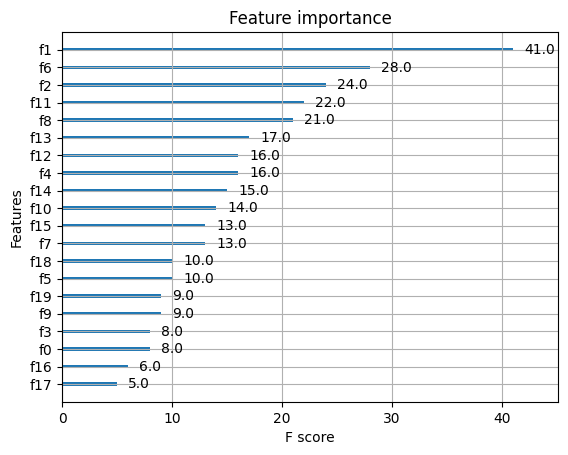

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [9]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Plot feature importance
plot_importance(xgb_model)
plt.show()


# Train the model on the selected features
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# XGBoost Model

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions on the training set
xgb_predictions_train = xgb_model.predict(X_train_scaled)

# Make predictions on the test set
xgb_predictions_test = xgb_model.predict(X_test_scaled)

# Calculate RMSE for training set
rmse_train = sqrt(mean_squared_error(y_train, xgb_predictions_train))

# Calculate MAE for training set
mae_train = mean_absolute_error(y_train, xgb_predictions_train)

# Calculate MSE for training set
mse_train = mean_squared_error(y_train, xgb_predictions_train)

# Calculate R2 score for training set
r2_train = r2_score(y_train, xgb_predictions_train)

# Print the metrics for the training set
print("XGBoost Training Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)

# Calculate RMSE for test set
rmse_test = sqrt(mean_squared_error(y_test, xgb_predictions_test))

# Calculate MAE for test set
mae_test = mean_absolute_error(y_test, xgb_predictions_test)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, xgb_predictions_test)

# Calculate R2 score for test set
r2_test = r2_score(y_test, xgb_predictions_test)

# Print the metrics for the test set
print("\nXGBoost Test Set Metrics:")
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("R2 Score:", r2_test)

XGBoost Training Set Metrics:
Root Mean Squared Error (RMSE): 8.109721520093423
Mean Absolute Error (MAE): 5.3271340189421235
Mean Squared Error (MSE): 65.76758313346639
R2 Score: -0.16769707986585392

XGBoost Test Set Metrics:
Root Mean Squared Error (RMSE): 7.9241933932075135
Mean Absolute Error (MAE): 5.451485950159081
Mean Squared Error (MSE): 62.7928409329536
R2 Score: -0.19393097249054803


In [11]:
# Predict rainfall for tomorrow using the XGBoost model
xgb_predict_tomorrow = xgb_model.predict(X_train)
xgb_predict_day_after_tomorrow = xgb_model.predict(X_train)
xgb_predict_two_days_after_tomorrow = xgb_model.predict(X_train)

# Print the predictions
print(f'XgBoost Prediction for tomorrow: {xgb_predict_tomorrow[0]} mm')
print(f'XgBoost Prediction for the day after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')
print(f'XgBoost Prediction for two days after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')

XgBoost Prediction for tomorrow: 1.3562347888946533 mm
XgBoost Prediction for the day after tomorrow: 1.3562347888946533 mm
XgBoost Prediction for two days after tomorrow: 1.3562347888946533 mm


c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [12]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_predictions_test}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# Calculate monthly median rainfall
monthly_median_rainfall = auckland_rain.groupby(auckland_rain['Date(NZST)'].dt.month)['rainfall(mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
auckland_rain['rainfall_percentage'] = (auckland_rain['rainfall(mm)'] / monthly_median_rainfall[auckland_rain['date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
auckland_rain['weather_condition'] = auckland_rain['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(auckland_rain[['date', 'rainfall(mm)', 'rainfall_percentage', 'weather_condition']])


KeyError: 'Date(NZST)'